In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import cv2

# Creating Our Training Data and Saving it

In [75]:
%matplotlib inline

In [89]:
IMG_SIZE = 150
CLASS_NAMES = ["no", "yes"]
DATADIR = os.path.join(os.getcwd(), "archive")

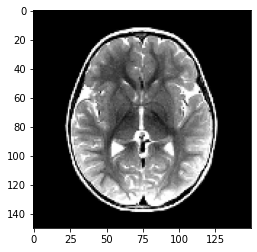

In [90]:
# Showing an instance of an image in my dataset
for cn in CLASS_NAMES:
    path = os.path.join(DATADIR, cn)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resizing all images to make them uniform
        plt.imshow(new_array, cmap="gray") # Grayscalling my image
        plt.show()
        break
    break

In [91]:
print(img_array)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [93]:
training_data = []

def create_training_data():
    for cn in CLASS_NAMES:
        path = os.path.join(DATADIR, cn)
        class_index = CLASS_NAMES.index(cn)
        
        for img in os.listdir(path):
            try:
                # Arrays containing all pixel values of 1 image
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Grayscalling my image
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resizing all images to make them uniform
                training_data.append([new_array, class_index])
            except Exception as e:
                pass

create_training_data()

In [94]:
print(len(training_data)) # 1500 no + 1500 yes 

3000


In [95]:
import random

# Shuffling our training data, because first we put all no's then it is stacked with yes's.
# This way, it is randomized so the machine can learn much better
random.shuffle(training_data)

In [96]:
# Seperating between our features and labels, then converting to numpy arrays

X = [] # Feature set
y = [] # Labels

for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, # -1 is a placeholder for how many features we already have 
                        IMG_SIZE, IMG_SIZE, 
                        1 # Since it is in grayscale, we put 1 since it is in 1 color scale
                       )

In [97]:
# Saving our data into a byte stream so that we don't have to repreocess the data every time

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [98]:
# To open our saved objects
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [99]:
X

array([[[[255],
         [ 56],
         [ 15],
         ...,
         [ 21],
         [ 21],
         [ 17]],

        [[255],
         [ 35],
         [ 22],
         ...,
         [ 18],
         [ 18],
         [ 15]],

        [[249],
         [ 27],
         [ 18],
         ...,
         [ 17],
         [ 17],
         [ 14]],

        ...,

        [[254],
         [ 42],
         [ 17],
         ...,
         [ 16],
         [ 16],
         [ 16]],

        [[255],
         [ 41],
         [ 19],
         ...,
         [ 17],
         [ 16],
         [ 17]],

        [[253],
         [ 39],
         [ 22],
         ...,
         [ 15],
         [ 13],
         [ 17]]],


       [[[  3],
         [  3],
         [  3],
         ...,
         [  3],
         [  3],
         [  3]],

        [[  3],
         [  3],
         [  3],
         ...,
         [  3],
         [  3],
         [  3]],

        [[  3],
         [  3],
         [  3],
         ...,
         [  3],
         [